<a href="https://colab.research.google.com/github/6398Shubhuu/TRANSACTION/blob/main/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
DF = pd.read_csv("/content/drive/MyDrive/Fraud.csv") #importing the data
DF.head() #SHOWING TOP 5

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [42]:
DF['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

ANALYING THE DATA


In [43]:
DF.info() #EXTRACTING THE INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [44]:
print(DF.shape)
DF.isnull().sum()

(6362620, 11)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [45]:
DF.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [46]:
# Exploring transaction type
DF.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [47]:
#count the columns with different datatypes like Category, Integer, Float.
obj = (DF.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (DF.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (DF.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [48]:
DF['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

We can clearly see that the dataset is highly unbalanced. where '0' represents Legit transactions and '1' represents Fraudulent transactions.

VISUALIZATION


In [49]:
type = DF["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(DF,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

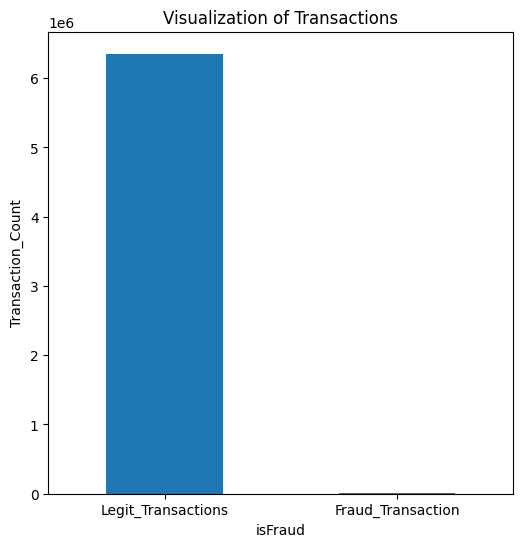

In [50]:
#VISUALINY THE isFRAUD
plt.figure(figsize=(6,6))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = DF.value_counts(DF['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Transaction_Count")
plt.xticks(range(2), labels)
plt.show()

<Axes: xlabel='type', ylabel='count'>

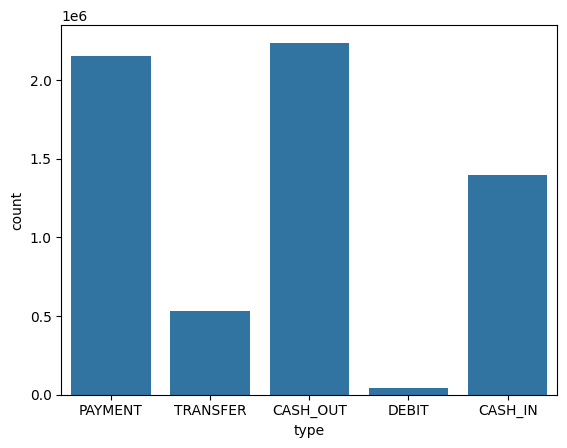

In [51]:
sns.countplot(x='type', data=DF)

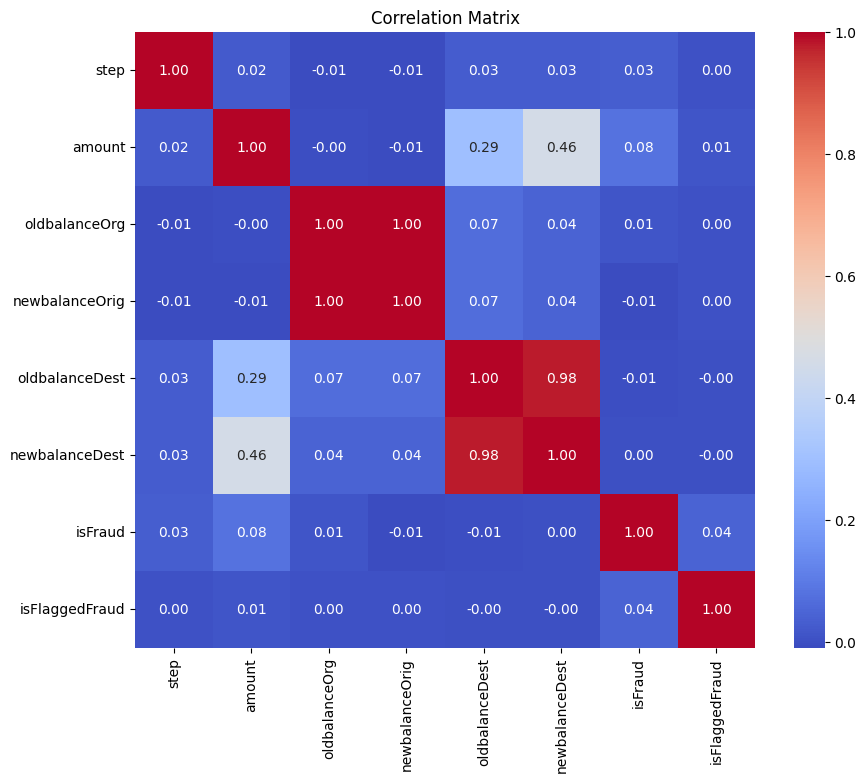

In [52]:
# Create a correlation matrix
correlation_matrix = DF.corr(numeric_only=True)  # To calculate correlation only for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Label Encoding
model buiilding process



```



In [53]:
df_sol = DF
df_sol.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [54]:
# Checking how many attributes are dtype: object

objList = df_sol.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [55]:
df_sol.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [56]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df_sol[feat] = le.fit_transform(df_sol[feat].astype(str))

print (df_sol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


#MULTICOLINEARITY

Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF) we are using here

In [57]:
# import variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def cal_vif(df_sol):

    # Calculating VIF
    for column in df_sol.columns:
      if df_sol[column].isnull().any():
        df_sol[column].fillna(df_sol[column].mean(), inplace=True)

    vif = pd.DataFrame()
    vif["variables"] = df_sol.columns
    vif["VIF"] = [variance_inflation_factor(df_sol.values, i) for i in range(df_sol.shape[1])]

    return(vif)

cal_vif(df_sol)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


oldbalanceOrg and newbalanceOrig have too high VIF , similarly  oldbalanceDest and newbalanceDest have too high VIF,


Thus combine these pairs of collinear attributes and drop the individual ones.

In [59]:
df_sol['Actual_amount_orig'] = df_sol.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_sol['Actual_amount_dest'] = df_sol.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df_sol['TransactionPath'] = df_sol.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df_sol = df_sol.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

cal_vif(df_sol)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


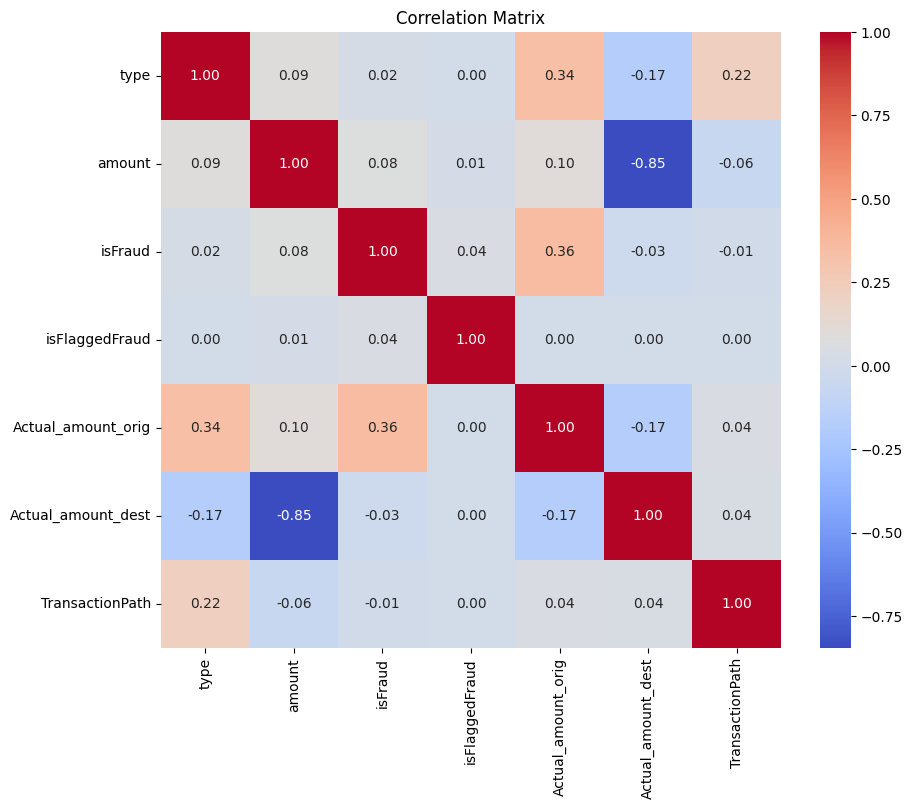

In [60]:
# Create a correlation matrix
correlation_matrix = df_sol.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Using VIF values and correlation heatmap. if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

#Model building

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#normalizing data

In [62]:
X = df_sol.drop(columns='isFraud', axis=1)
Y = df_sol['isFraud']

In [63]:
# Split the data for train / test
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 0)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


#Model Trainning

In [64]:
# #DECISION TREE
DT_clasifier= DecisionTreeClassifier()
DT_clasifier.fit(X_train, Y_train)
Y_pred_df = DT_clasifier.predict(X_test)
Decision_tree_score = DT_clasifier.score(X_test, Y_test) * 100

In [65]:

RT_clasifier= LinearRegression()
RT_clasifier.fit(X_train, Y_train)
Y_pred_Rf = RT_clasifier.predict(X_test)
Linear_Regression_score = RT_clasifier.score(X_test, Y_test) * 100

In [66]:
XT_clasifier= XGBClassifier()
XT_clasifier.fit(X_train, Y_train)
Y_pred_XT = XT_clasifier.predict(X_test)
XT_score = XT_clasifier.score(X_test, Y_test) * 100

In [67]:
# Print scores of our classifiers

print("Decision Tree Score: ", Decision_tree_score)
print("Linear REgression Score: ", Linear_Regression_score)
print("XGBOOST Score: ", Decision_tree_score)


Decision Tree Score:  99.92455937962663
Linear REgression Score:  16.028651781875602
XGBOOST Score:  99.92455937962663


In [69]:
classification_report_dt = classification_report(Y_test, Y_pred_df)
print("Classification Report for Decision Tree:")
print(classification_report_dt)


classification_report_dt = classification_report(Y_test, Y_pred_XT)
print("Classification Report for XGBOOST:")
print(classification_report_dt)


Y_pred_Rf = np.round(Y_pred_Rf)
classification_report_RT = classification_report(Y_test, Y_pred_Rf, zero_division=1)
print("Classification Report for Linear Regression:")
print(classification_report_RT)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.70      0.72      0.71      2419

    accuracy                           1.00   1908786
   macro avg       0.85      0.86      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for XGBOOST:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.97      0.70      0.81      2419

    accuracy                           1.00   1908786
   macro avg       0.99      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Linear Regression:
              precision    recall  f1-score   support

        -1.0       0.00      1.00      0.00         0
         0.0       1.00      1.00      1.00   1906367
         1.0       1.00      0.11      0.19      2419

    acc

In [70]:
from sklearn.metrics import mean_squared_error

In [73]:
classification_report_dt = mean_squared_error(Y_test, Y_pred_df)
print("Mean_squared_error for Decision Tree:")
print(classification_report_dt*1000)

print()
classification_report_dt = mean_squared_error(Y_test, Y_pred_XT)
print("Mean_squared_error for XGBOOST:")
print(classification_report_dt*1000)

print()
classification_report_RT = mean_squared_error(Y_test, Y_pred_Rf)
print("Mean_squared_error for Linear Regression:")
print(classification_report_RT*1000)

Mean_squared_error for Decision Tree:
0.7544062037336821

Mean_squared_error for XGBOOST:
0.4102083732801896

Mean_squared_error for Linear Regression:
1.135276557979784


After Looking at the precision and Square Mean Error of all the model the best one is XGBOOST, followed by Decision Tree, poorest is Linear regression.  

In [74]:
print("TP,FP,TN,FN - XGBOOST")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_XT).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - XGBOOST
True Positives: 1687
False Positives: 51
True Negatives: 1906316
False Negatives: 732


<Axes: >

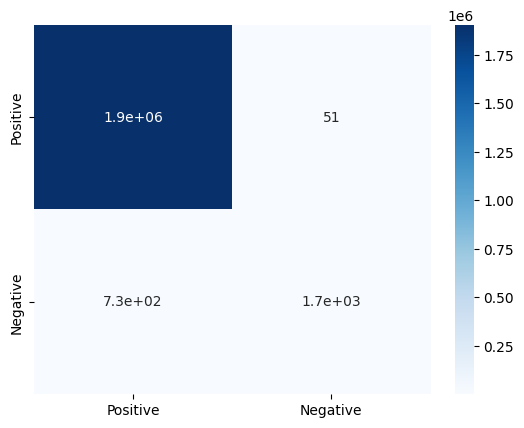

In [83]:
# Get the confusion matrix
cf_matrix = confusion_matrix(Y_test, Y_pred_XT)

# Define class labels
class_labels = ["Positive", "Negative"]

# Create heatmap with labels
sns.heatmap(cf_matrix, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)